# Interpolation et régression

On évoque dans ce TD les notions d'**interpolation** et de **régression** qui seront abordées de façon plus profonde dans les cours suivants. Il s'agit d'un cas d'étude très utile en pratique et qui permet de réinvestir les notions abordées.

La question est la suivante : considérant un ensemble de points, peut-on définir un polynôme qui passe par ceux-ci? Et de quel ordre?

Pour commencer, on considère un polynôme d'ordre 2 et on généralisera. Le polynôme $P_2$ s'écrit : 
$$
P_2(x) = a_0 + a_1 x + a_2 x^2.
$$
Ces coefficients $a_0$, $a_1$ et $a_2$ sont inconnus : c'est d'ailleurs eux qu'on cherche! On a donc 3 inconnues, il nous faut 3 équations donc 3 points pour définir le polynôme de façon unique. En généralisant, on en déduit qu'il ne passe qu'un unique polynôme d'ordre $p-1$ par $p$ points. Il s'agit ni plus ni moins de la généralisation polynomiale du "par deux points, il ne passe qu'une seule droite"! Ce résultat est très important dans la méthode des **éléments finis** : il explique notamment le nombre de noeuds selon le type d'interpolation choisie. Par exemple, un élément triangle aura 3 noeuds pour une interpolation linéaire mais 6 pour une interpolation quadratique.

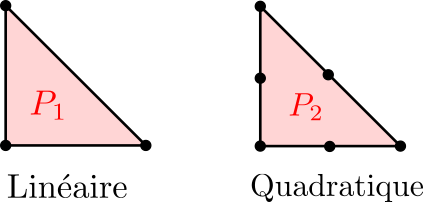


On considère donc que notre polynôme d'ordre 2 passe par 3 points connus $(x_0, y_0)$, $(x_1,y_1)$ et $(x_2, y_2)$. Ces couples $(x_i, y_i)$ sont reliés par l'expression du polynôme. On a donc :
$$
\left \{
\begin{matrix}
a_0 + a_1 x_0 + a_2 x_0^2 & = & y_0 \\
a_0 + a_1 x_1 + a_2 x_1^2 & = & y_1 \\
a_0 + a_1 x_2 + a_2 x_2^2 & = & y_2
\end{matrix}
\right.
$$
On peut réarrangeant ce système d'équations linéaires de façon matricielle :
$$
\begin{pmatrix}
1 & x_0 & x_0^2 \\
1 & x_1 & x_1^2  \\
1 & x_2 & x_2^2 
\end{pmatrix}
\cdot 
\begin{pmatrix}
a_0  \\
a_1  \\
a_2 
\end{pmatrix}
=
\begin{pmatrix}
y_0  \\
y_1  \\
y_2 
\end{pmatrix}
$$
On retrouve un système matricielle de la forme : 
$$
\mathbf X \cdot \mathbf a
= \mathbf y.
$$
Ce résultat se généralise en dimension quelconque. En considérant un polynôme d'ordre $p$, on pourra écrire le système résultant sous la forme :
$$
\begin{pmatrix}
1 & x_0 & \cdots & x_0^p \\
\vdots &  & & \vdots  \\
1 & x_p & \cdots & x_p^p 
\end{pmatrix}
\cdot 
\begin{pmatrix}
a_0  \\
\vdots  \\
a_p
\end{pmatrix}
=
\begin{pmatrix}
y_0  \\
\vdots  \\
y_p
\end{pmatrix}.
$$
On voit la matrice $\mathbf X$ a une forme assez particulière : on parle de **matrice de Vandermonde**. NumPy permet de générer de telles matrices à l'aide de `np.vander`. Cette méthode est en fait parfaitement équivalente à l'**interpolation polynomiale de Lagrange** qui sera abordée dans le cours et qui peut être réalisée grâce à `scipy.interpolate.lagrange`. Néanmoins, les approches mathématiques et algorithmiques sont différentes et on préfèrera généralement utiliser la méthode de Lagrange, plus performante en pratique.
Il est intéressant de noter dans le code suivant que lorsque l'ordre du polynôme augmente, le comportement devient **instable** : cela correspond au **phénomène de Runge**.

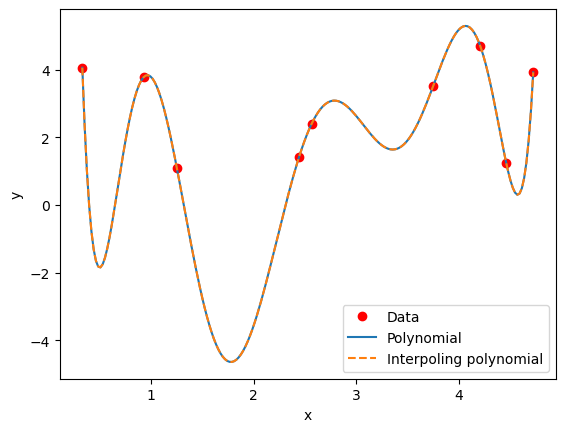

In [16]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

order = 8

n = order + 1

x_i = 5.*np.random.random(n)
y_i = 5.*np.random.random(n)

X = np.vander(x_i)

a = la.solve(X, y_i)

plt.plot(x_i, y_i, "ro", label="Data")

x_pred = np.linspace(x_i.min(), x_i.max(), 200)
y_pred = np.polyval(a, x_pred)

poly_lagrange = lagrange(x_i, y_i)
plt.plot(x_pred, Polynomial(poly_lagrange.coef[::-1])(x_pred), label='Polynomial')

plt.plot(x_pred, y_pred, "--", label = "Interpoling polynomial")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()

## Régression linéaire

Vous avez certainement déjà utilisé une **régression linéaire**, pour modéliser le comportement d'une expérience par exemple. Dans cette section, on se propose d'étudier ce qui se cache derrière.

Ce problème est en fait assez proche de celui de l'interpolation lorsqu'il est abordé comme un problème d'analyse/algèbre. On raisonne avec un polynôme d'ordre 1 $P_1$ (i.e. une droite) dont l'équation s'écrit :
$$
P_1(x)
=
a_0 + a_1 x.
$$
De plus, on dispose de $p$ points $(x_i, y_i)_{i=1,...,p}$ correspondant par exemple aux résultats d'une expérience. Ces derniers possèdent une certaine dispersion. On va cherche les coefficients $a_0$ et $a_1$ qui décrivent au mieux les points. Qu'est ce que cela veut dire en pratique?

Contrairement au cas précédent, le polynôme ne passe pas par tous les points et en général : 
$$
y_i \ne P_1(x_i).
$$
L'idée est de dire que la meilleure droite possible est celle qui minise l'écart $\varepsilon_i$ entre les $y_i$ et $P_1$ :
$$
\varepsilon_i = (y_i - P_1(x_i)).
$$
On prend ensuite le carré des écarts pour obtenir une expression positive et dérivable, puis on les somme. Finalement, on cherche $a_0, a_1$ tels que : 
$$
a_0, a_1 
=
\arg \min \sum_i \varepsilon_i^2
=
\arg \min \sum_i (y_i - a_0 - a_1 x_i)^2.
$$
On appelle classiquement un problème de ce type, un **problème des moindres carrés**.

On peux remarquer que la fonction à minimiser ressemble au carré d'une norme de vecteur :
$$
\| \mathbf v\|^2 = 
\mathbf v\cdot \mathbf v
=
\sum_i v_i^2.
$$
On peut ainsi réarranger l'expression en :
$$
\sum_i \varepsilon_i^2
=
\|\mathbf y - \mathbf X \cdot \mathbf a\|^2
$$
avec :
$$
\mathbf y
=
\begin{pmatrix}
y_1 \\
\vdots \\
y_p
\end{pmatrix}, \quad
\mathbf X = 
\begin{pmatrix}
1 & x_1 \\
\vdots &\vdots \\
1 & x_p
\end{pmatrix}, \quad
\mathbf a 
=
\begin{pmatrix}
a_0 \\
a_1
\end{pmatrix}.
$$
On cherche le minimum de cette quantité par rapport à $\mathbf a$. Celui-ci est atteint lorsque la dérivée par rapport à $\mathbf a$ s'annule : 
$$
\frac{\partial}{\partial \mathbf a}\|\mathbf y - \mathbf X \cdot \mathbf a\|^2
=
-2 \mathbf X^T \cdot (\mathbf y - \mathbf X \cdot \mathbf a) =0.
$$
En réarrangeant l'expression, on fait apparaître le système linéaire suivant :
$$ 
(\mathbf X^T \cdot \mathbf X )\cdot \mathbf a
=
\mathbf X^T \cdot \mathbf y.
$$
La résolution de ce système nous donne les coefficients de la droite.

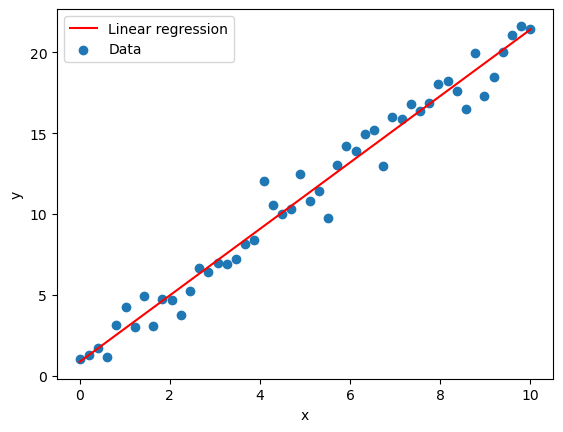

In [174]:
x = np.linspace(0, 10)
n = len(x)
eps = np.random.normal(size=n)

y = 1. + 2.*x + eps
plt.scatter(x, y, label="Data")

X = np.ones((n, 2))
X[:, 1] = x

b = X.transpose().dot(y)
A = X.transpose().dot(X)

beta = la.solve(A, b)
beta = np.flip(beta)

x_pred = np.linspace(x.min(), x.max())
y_pred = np.polyval(beta, x)

plt.plot(x_pred, y_pred, "r", label="Linear regression")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()

## Régression polynomiale

Le cas de la régression polynomiale est une petite généralisation de la régression linéaire. Concrètement la seule différence est, qu'au lieu de travailler avec une droite $P_1$, on prend un polynôme d'ordre $n$, $P_n$ de coefficients $a_0,...,a_n$. On cherchera ces coefficients en minimisant :
$$
\sum_i \varepsilon_i^2
=
\sum_i (y_i - P_n(x_i))^2
=
\sum_i (y_i - a_0 - a_1x_i - \cdots - a_n x_i^n )^2.
$$
À nouveau, on peut factoriser l'expression : 
$$
\sum_i \varepsilon_i^2
=
\|\mathbf y - \mathbf X \cdot \mathbf a\|^2
$$
avec : 
$$
\mathbf y
=
\begin{pmatrix}
y_1 \\
\vdots \\
y_p
\end{pmatrix}, \quad
\mathbf X = 
\begin{pmatrix}
1 & x_1 & \cdots & x_1^n \\
\vdots &\vdots & & \vdots \\
1 & x_p & \cdots  & x_p^n
\end{pmatrix}, \quad
\mathbf a 
=
\begin{pmatrix}
a_0 \\
\vdots \\
a_n
\end{pmatrix}.
$$
On reconnaît à nouveau une matrice de Vandermonde rectangulaire. Le problème se met donc sous la même forme que pour la régression linéaire. Donc, pour trouver $\mathbf a$, il suffit de résoudre :
$$ 
(\mathbf X^T \cdot \mathbf X )\cdot \mathbf a
=
\mathbf X^T \cdot \mathbf y.
$$
À nouveau, on observe des oscillations lorsque l'ordre du polynôme augmente.

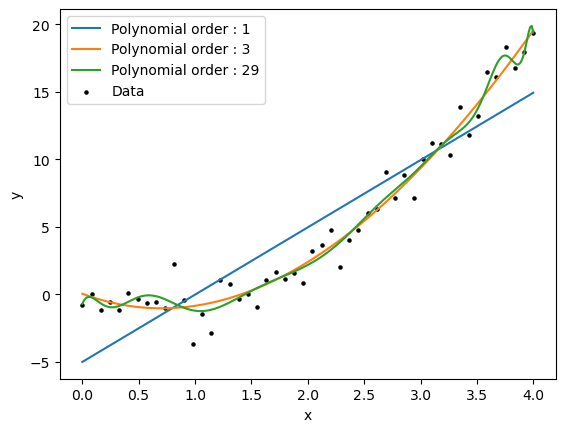

In [17]:
x = np.linspace(0, 4)
n = len(x)
eps = np.random.normal(size=n)

y = 2.*np.square(x) - 3*x + eps
plt.scatter(x, y, s = 5., color="k", label="Data")

orders = np.array([2, 4, 30])

for order in orders: 
    X = np.vander(x, N=order)
    A = X.transpose().dot(X)

    b = X.transpose().dot(y)

    beta = la.solve(A, b)
    
    x_pred = np.linspace(0, 4, 300)
    y_pred = np.polyval(beta, x_pred)
    
    plt.plot(x_pred, y_pred, label="Polynomial order : "+str(order - 1))

plt.xlabel("x")
plt.ylabel("y")

plt.legend()